In [3]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.



  Using cached tensorflow-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached tensorflow_gpu-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached mediapipe-0.8.10.1-cp39-cp39-win_amd64.whl (48.7 MB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [43]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh # Face mesh

In [2]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [3]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [30]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
draw_landmarks(frame, results)

NameError: name 'frame' is not defined

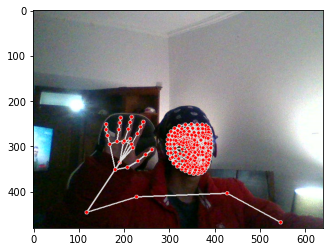

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [18]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [26]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [5]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [28]:
result_test = extract_keypoints(results)

In [29]:
result_test

array([ 0.58700097,  0.63139993, -0.85116816, ...,  0.25186428,
        0.52491641, -0.02985198])

# 4. Folders for collections

In [6]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hola', 'Chao', 'Gracias'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

'C:\\Users\\Martin Posso\\Documents\\sign-language-model'

In [73]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoints Values for Training and Testing

In [74]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [15]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'Hola': 0, 'Chao': 1, 'Gracias': 2}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape

(90, 30, 1662)

In [13]:
np.array(labels).shape

(90,)

In [14]:
X = np.array(sequences)

In [15]:
X.shape

(90, 30, 1662)

In [16]:
y = to_categorical(labels).astype(int)

In [17]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [19]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [23]:
res = [.7, 0.2, 0.1]

In [24]:
actions[np.argmax(res)]

'Hola'

In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=520, callbacks=[tb_callback])

Epoch 1/520
3/3 [==============================] - 4s 581ms/step - loss: 3.5644 - categorical_accuracy: 0.3412
Epoch 2/520
3/3 [==============================] - 0s 61ms/step - loss: 6.0224 - categorical_accuracy: 0.3765
Epoch 3/520
3/3 [==============================] - 0s 76ms/step - loss: 1.1006 - categorical_accuracy: 0.4471
Epoch 4/520
3/3 [==============================] - 0s 68ms/step - loss: 1.1286 - categorical_accuracy: 0.3765
Epoch 5/520
3/3 [==============================] - 0s 68ms/step - loss: 1.1157 - categorical_accuracy: 0.4118
Epoch 6/520
3/3 [==============================] - 0s 62ms/step - loss: 0.9636 - categorical_accuracy: 0.6353
Epoch 7/520
3/3 [==============================] - 0s 64ms/step - loss: 0.7647 - categorical_accuracy: 0.6118
Epoch 8/520
3/3 [==============================] - 0s 63ms/step - loss: 0.9186 - categorical_accuracy: 0.6000
Epoch 9/520
3/3 [==============================] - 0s 59ms/step - loss: 2.0230 - categorical_accuracy: 0.4353
Epoch 10/

3/3 [==============================] - 0s 75ms/step - loss: 1.0541 - categorical_accuracy: 0.4353
Epoch 75/520
3/3 [==============================] - 0s 70ms/step - loss: 0.9853 - categorical_accuracy: 0.4235
Epoch 76/520
3/3 [==============================] - 0s 66ms/step - loss: 0.9327 - categorical_accuracy: 0.5412
Epoch 77/520
3/3 [==============================] - 0s 64ms/step - loss: 0.8684 - categorical_accuracy: 0.7176
Epoch 78/520
3/3 [==============================] - 0s 65ms/step - loss: 0.8368 - categorical_accuracy: 0.6235
Epoch 79/520
3/3 [==============================] - 0s 66ms/step - loss: 0.8430 - categorical_accuracy: 0.6000
Epoch 80/520
3/3 [==============================] - 0s 64ms/step - loss: 0.9037 - categorical_accuracy: 0.5882
Epoch 81/520
3/3 [==============================] - 0s 65ms/step - loss: 0.9333 - categorical_accuracy: 0.4706
Epoch 82/520
3/3 [==============================] - 0s 65ms/step - loss: 1.2974 - categorical_accuracy: 0.3412
Epoch 83/520
3

3/3 [==============================] - 0s 67ms/step - loss: 0.6729 - categorical_accuracy: 0.6471
Epoch 148/520
3/3 [==============================] - 0s 63ms/step - loss: 0.6586 - categorical_accuracy: 0.7059
Epoch 149/520
3/3 [==============================] - 0s 71ms/step - loss: 0.7090 - categorical_accuracy: 0.7176
Epoch 150/520
3/3 [==============================] - 0s 71ms/step - loss: 0.6241 - categorical_accuracy: 0.6824
Epoch 151/520
3/3 [==============================] - 0s 68ms/step - loss: 0.5608 - categorical_accuracy: 0.7059
Epoch 152/520
3/3 [==============================] - 0s 72ms/step - loss: 0.5083 - categorical_accuracy: 0.7529
Epoch 153/520
3/3 [==============================] - 0s 69ms/step - loss: 0.5632 - categorical_accuracy: 0.6706
Epoch 154/520
3/3 [==============================] - 0s 68ms/step - loss: 0.6733 - categorical_accuracy: 0.6941
Epoch 155/520
3/3 [==============================] - 0s 69ms/step - loss: 0.5388 - categorical_accuracy: 0.7176
Epoch 

3/3 [==============================] - 0s 69ms/step - loss: 0.5690 - categorical_accuracy: 0.7412
Epoch 221/520
3/3 [==============================] - 0s 67ms/step - loss: 0.6163 - categorical_accuracy: 0.6706
Epoch 222/520
3/3 [==============================] - 0s 70ms/step - loss: 0.5984 - categorical_accuracy: 0.6588
Epoch 223/520
3/3 [==============================] - 0s 65ms/step - loss: 0.5719 - categorical_accuracy: 0.7529
Epoch 224/520
3/3 [==============================] - 0s 66ms/step - loss: 0.5545 - categorical_accuracy: 0.8000
Epoch 225/520
3/3 [==============================] - 0s 65ms/step - loss: 0.4916 - categorical_accuracy: 0.7647
Epoch 226/520
3/3 [==============================] - 0s 68ms/step - loss: 0.4678 - categorical_accuracy: 0.7176
Epoch 227/520
3/3 [==============================] - 0s 68ms/step - loss: 0.4929 - categorical_accuracy: 0.7412
Epoch 228/520
3/3 [==============================] - 0s 67ms/step - loss: 0.5647 - categorical_accuracy: 0.7647
Epoch 

3/3 [==============================] - 0s 64ms/step - loss: 1.0680 - categorical_accuracy: 0.4353
Epoch 294/520
3/3 [==============================] - 0s 68ms/step - loss: 1.0451 - categorical_accuracy: 0.5412
Epoch 295/520
3/3 [==============================] - 0s 71ms/step - loss: 0.9695 - categorical_accuracy: 0.5647
Epoch 296/520
3/3 [==============================] - 0s 70ms/step - loss: 1.1019 - categorical_accuracy: 0.4118
Epoch 297/520
3/3 [==============================] - 0s 70ms/step - loss: 0.9238 - categorical_accuracy: 0.6706
Epoch 298/520
3/3 [==============================] - 0s 71ms/step - loss: 0.8805 - categorical_accuracy: 0.6706
Epoch 299/520
3/3 [==============================] - 0s 64ms/step - loss: 0.7891 - categorical_accuracy: 0.6000
Epoch 300/520
3/3 [==============================] - 0s 76ms/step - loss: 0.7394 - categorical_accuracy: 0.6235
Epoch 301/520
3/3 [==============================] - 0s 68ms/step - loss: 0.8319 - categorical_accuracy: 0.5765
Epoch 

3/3 [==============================] - 0s 63ms/step - loss: 0.3574 - categorical_accuracy: 0.8118
Epoch 367/520
3/3 [==============================] - 0s 64ms/step - loss: 0.3620 - categorical_accuracy: 0.8235
Epoch 368/520
3/3 [==============================] - 0s 66ms/step - loss: 0.3060 - categorical_accuracy: 0.8353
Epoch 369/520
3/3 [==============================] - 0s 71ms/step - loss: 0.2729 - categorical_accuracy: 0.8706
Epoch 370/520
3/3 [==============================] - 0s 68ms/step - loss: 0.2996 - categorical_accuracy: 0.8706
Epoch 371/520
3/3 [==============================] - 0s 70ms/step - loss: 0.4473 - categorical_accuracy: 0.7412
Epoch 372/520
3/3 [==============================] - 0s 69ms/step - loss: 0.3368 - categorical_accuracy: 0.8118
Epoch 373/520
3/3 [==============================] - 0s 69ms/step - loss: 0.2863 - categorical_accuracy: 0.8941
Epoch 374/520
3/3 [==============================] - 0s 71ms/step - loss: 0.3245 - categorical_accuracy: 0.8588
Epoch 

3/3 [==============================] - 0s 65ms/step - loss: 0.2413 - categorical_accuracy: 0.9176
Epoch 440/520
3/3 [==============================] - 0s 68ms/step - loss: 0.2258 - categorical_accuracy: 0.8706
Epoch 441/520
3/3 [==============================] - 0s 66ms/step - loss: 0.2203 - categorical_accuracy: 0.8941
Epoch 442/520
3/3 [==============================] - 0s 74ms/step - loss: 0.2139 - categorical_accuracy: 0.9294
Epoch 443/520
3/3 [==============================] - 0s 69ms/step - loss: 0.1963 - categorical_accuracy: 0.9294
Epoch 444/520
3/3 [==============================] - 0s 71ms/step - loss: 0.1853 - categorical_accuracy: 0.9059
Epoch 445/520
3/3 [==============================] - 0s 72ms/step - loss: 0.2301 - categorical_accuracy: 0.9059
Epoch 446/520
3/3 [==============================] - 0s 76ms/step - loss: 0.2507 - categorical_accuracy: 0.8824
Epoch 447/520
3/3 [==============================] - 0s 70ms/step - loss: 0.2110 - categorical_accuracy: 0.9176
Epoch 

3/3 [==============================] - 0s 69ms/step - loss: 0.1472 - categorical_accuracy: 0.9176
Epoch 513/520
3/3 [==============================] - 0s 72ms/step - loss: 0.1501 - categorical_accuracy: 0.9176
Epoch 514/520
3/3 [==============================] - 0s 71ms/step - loss: 0.1491 - categorical_accuracy: 0.9176
Epoch 515/520
3/3 [==============================] - 0s 72ms/step - loss: 0.1424 - categorical_accuracy: 0.9176
Epoch 516/520
3/3 [==============================] - 0s 68ms/step - loss: 0.1664 - categorical_accuracy: 0.9059
Epoch 517/520
3/3 [==============================] - 0s 70ms/step - loss: 0.1584 - categorical_accuracy: 0.9412
Epoch 518/520
3/3 [==============================] - 0s 66ms/step - loss: 0.1339 - categorical_accuracy: 0.9294
Epoch 519/520
3/3 [==============================] - 0s 70ms/step - loss: 0.2290 - categorical_accuracy: 0.9176
Epoch 520/520
3/3 [==============================] - 0s 67ms/step - loss: 0.3238 - categorical_accuracy: 0.8471


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [28]:
res = model.predict(X_test)

In [29]:
actions[np.argmax(res[4])]

'Gracias'

In [30]:
actions[np.argmax(y_test[4])]

'Gracias'

# 9. Save Weights

In [31]:
model.save('action.h5')

In [32]:
del model

In [34]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [35]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [36]:
yhat = model.predict(X_test)

In [37]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [38]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 1],
        [0, 1]],

       [[4, 0],
        [1, 0]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [39]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [40]:
from scipy import stats

In [41]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [85]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [48]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class '